#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import poisson

#### Load Dataset

In [2]:
df = pd.read_excel("./ModifiedCallCenterTwo.xlsx")
df.head(10)

,Call Id,Agent,Date,Time,Topic,Answered (Y/N),Resolved,Speed of answer in seconds,AvgTalkDuration,Satisfaction rating
0,ID0001,Sarah,2021-01-01,09:12:58,Contract related,Y,Y,109.0,00:02:23,3.0
1,ID0002,Sarah,2021-01-01,09:12:58,Technical Support,Y,N,70.0,00:04:02,3.0
2,ID0003,Sarah,2021-01-01,09:47:31,Contract related,Y,Y,10.0,00:02:11,3.0
3,ID0004,Sarah,2021-01-01,09:47:31,Contract related,Y,Y,53.0,00:00:37,2.0
4,ID0005,Sarah,2021-01-01,10:00:29,Payment related,Y,Y,95.0,00:01:00,3.0
5,ID0006,Tom,2021-01-01,10:00:29,Technical Support,N,N,NaN,NaN,NaN
6,ID0007,Sarah,2021-01-01,10:22:05,Payment related,Y,Y,24.0,00:03:40,2.0
7,ID0008,Sarah,2021-01-01,10:22:05,Payment related,Y,Y,22.0,00:00:38,4.0
8,ID0009,Tom,2021-01-01,11:13:55,Admin Support,Y,Y,15.0,00:06:38,4.0
9,ID0010,Tom,2021-01-01,11:13:55,Streaming,Y,Y,78.0,00:01:04,3.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Call Id                     5000 non-null   object 
 1   Agent                       5000 non-null   object 
 2   Date                        5000 non-null   object 
 3   Time                        5000 non-null   object 
 4   Topic                       5000 non-null   object 
 5   Answered (Y/N)              5000 non-null   object 
 6   Resolved                    5000 non-null   object 
 7   Speed of answer in seconds  4054 non-null   float64
 8   AvgTalkDuration             4054 non-null   object 
 9   Satisfaction rating         4054 non-null   float64
dtypes: float64(2), object(8)
memory usage: 390.8+ KB


#### Preprocessing

In [4]:
# Converting date and time to datetime
df['Date'] = pd.to_datetime(df['Date']) 
df['Time'] = df['Time'].astype(str)
df['Time'] = pd.to_datetime(df['Time']) # Converting to string

# Combining Date and Time into a single datetime column
df["Datetime"] = pd.to_datetime(df["Date"].astype(str) + " " + df["Time"].astype(str))  # Converting to string
df['Datetime'] = df['Datetime'].dt.tz_localize(None) 

# Sorting by datetime to ensure correct order
df = df.sort_values(by="Datetime").reset_index(drop=True)

In [5]:
# Converting Y and N to 0 and 1
df['Answered (Y/N)'] = df['Answered (Y/N)'].map(dict(Y = 1, N = 0)) 
df['Resolved'] = df['Resolved'].map(dict(Y = 1, N = 0))

In [6]:
# Let's see the updated dataset
df.head(10)

,Call Id,Agent,Date,Time,Topic,Answered (Y/N),Resolved,Speed of answer in seconds,AvgTalkDuration,Satisfaction rating,Datetime
0,ID0001,Sarah,2021-01-01,2025-04-28 09:12:58,Contract related,1,1,109.0,00:02:23,3.0,2021-01-01 09:12:58
1,ID0002,Sarah,2021-01-01,2025-04-28 09:12:58,Technical Support,1,0,70.0,00:04:02,3.0,2021-01-01 09:12:58
2,ID0003,Sarah,2021-01-01,2025-04-28 09:47:31,Contract related,1,1,10.0,00:02:11,3.0,2021-01-01 09:47:31
3,ID0004,Sarah,2021-01-01,2025-04-28 09:47:31,Contract related,1,1,53.0,00:00:37,2.0,2021-01-01 09:47:31
4,ID0005,Sarah,2021-01-01,2025-04-28 10:00:29,Payment related,1,1,95.0,00:01:00,3.0,2021-01-01 10:00:29
5,ID0006,Tom,2021-01-01,2025-04-28 10:00:29,Technical Support,0,0,NaN,NaN,NaN,2021-01-01 10:00:29
6,ID0007,Sarah,2021-01-01,2025-04-28 10:22:05,Payment related,1,1,24.0,00:03:40,2.0,2021-01-01 10:22:05
7,ID0008,Sarah,2021-01-01,2025-04-28 10:22:05,Payment related,1,1,22.0,00:00:38,4.0,2021-01-01 10:22:05
8,ID0010,Tom,2021-01-01,2025-04-28 11:13:55,Streaming,1,1,78.0,00:01:04,3.0,2021-01-01 11:13:55
9,ID0009,Tom,2021-01-01,2025-04-28 11:13:55,Admin Support,1,1,15.0,00:06:38,4.0,2021-01-01 11:13:55


*Now, let's see which agent handles which calls so that we can categorise the call types*

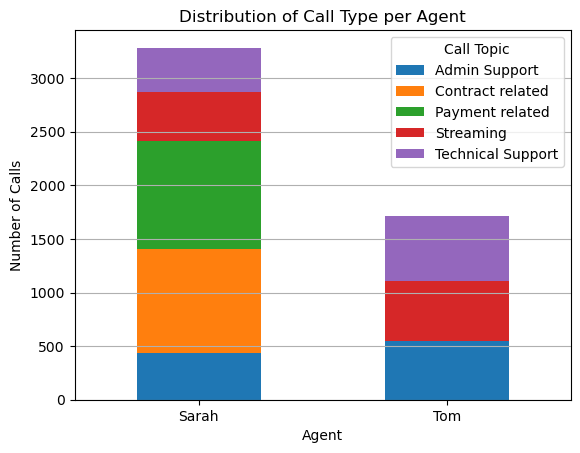

In [7]:
# Displaying which agent handles which type of calls
topic_dist = df.groupby(["Agent", "Topic"]).size().unstack()
topic_dist.plot(kind="bar", stacked=True)

plt.xlabel("Agent")
plt.ylabel("Number of Calls")
plt.title("Distribution of Call Type per Agent")
plt.legend(title="Call Topic", loc='upper right')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


Now, from the above visualisation let's map the call Topic to CallType

Tom Handles only Admin Support, Streaming, Technical Support related calls while Sarah handles all five types of calls. Hence we can categorise the calls as follow: 

**CallType 1 = Contract related, Payment related**

**CallType 2 = Admin Support, Streaming, Technical Support**

In [8]:
# Creating a new column of CallType
df["CallType"] = df["Topic"].map(lambda x: 1 if x in ["Contract related", "Payment related"] else 2)

In [9]:
# Computing inter-arrival time (in seconds)
df["InterArrival"] = df["Datetime"].diff().dt.total_seconds().fillna(0)

# Converting AvgTalkDuration to seconds
df["AvgTalkDuration"] = pd.to_timedelta(df["AvgTalkDuration"]).dt.total_seconds()

# Computing basic statistics
arrival_stats = df.groupby("CallType")["InterArrival"].mean()
service_stats = df.groupby("CallType")["AvgTalkDuration"].mean()


print("Average Inter-Arrival Time ( in seconds) by Call Type:\n", arrival_stats)
print("\nAverage Talk Duration (in seconds) by Call Type:\n", service_stats)



Average Inter-Arrival Time ( in seconds) by Call Type:
 CallType
1    1482.350479
2    1584.524693
Name: InterArrival, dtype: float64

Average Talk Duration (in seconds) by Call Type:
 CallType
1    221.827629
2    226.955456
Name: AvgTalkDuration, dtype: float64


In [10]:
# Let's see the dataset now
df.head()

,Call Id,Agent,Date,Time,Topic,Answered (Y/N),Resolved,Speed of answer in seconds,AvgTalkDuration,Satisfaction rating,Datetime,CallType,InterArrival
0,ID0001,Sarah,2021-01-01,2025-04-28 09:12:58,Contract related,1,1,109.0,143.0,3.0,2021-01-01 09:12:58,1,0.0
1,ID0002,Sarah,2021-01-01,2025-04-28 09:12:58,Technical Support,1,0,70.0,242.0,3.0,2021-01-01 09:12:58,2,0.0
2,ID0003,Sarah,2021-01-01,2025-04-28 09:47:31,Contract related,1,1,10.0,131.0,3.0,2021-01-01 09:47:31,1,2073.0
3,ID0004,Sarah,2021-01-01,2025-04-28 09:47:31,Contract related,1,1,53.0,37.0,2.0,2021-01-01 09:47:31,1,0.0
4,ID0005,Sarah,2021-01-01,2025-04-28 10:00:29,Payment related,1,1,95.0,60.0,3.0,2021-01-01 10:00:29,1,778.0


In [11]:
# Calculating the percentage of answered calls per agent
call_ans_per_agent = df.groupby("Agent")["Answered (Y/N)"].mean() * 100
print('Percentage of answered calls per agent:')
print(call_ans_per_agent)

Percentage of answered calls per agent:
Agent
Sarah    80.876979
Tom      81.468531
Name: Answered (Y/N), dtype: float64


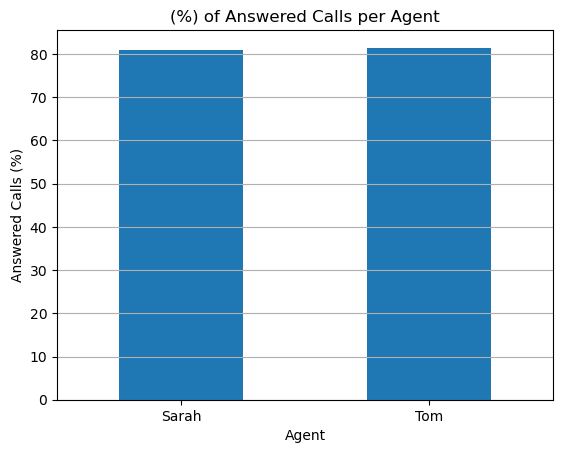

In [12]:
# Ploting Answered Calls Percentage per Agent
call_ans_per_agent.plot(kind="bar")

plt.xlabel("Agent")
plt.ylabel("Answered Calls (%)")
plt.title("(%) of Answered Calls per Agent")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


In [13]:
# Checking null values
pd.isnull(df).sum()

Call Id                         0
Agent                           0
Date                            0
Time                            0
Topic                           0
Answered (Y/N)                  0
Resolved                        0
Speed of answer in seconds    946
AvgTalkDuration               946
Satisfaction rating           946
Datetime                        0
CallType                        0
InterArrival                    0
dtype: int64

In [14]:
# Droping the missing values since these null values represents unanswered calls
df = df.dropna(subset=['Speed of answer in seconds', 'AvgTalkDuration', 'Satisfaction rating'])
pd.isnull(df).sum()

Call Id                       0
Agent                         0
Date                          0
Time                          0
Topic                         0
Answered (Y/N)                0
Resolved                      0
Speed of answer in seconds    0
AvgTalkDuration               0
Satisfaction rating           0
Datetime                      0
CallType                      0
InterArrival                  0
dtype: int64

In [15]:
# Dataset after cleaning
df.head(10)

,Call Id,Agent,Date,Time,Topic,Answered (Y/N),Resolved,Speed of answer in seconds,AvgTalkDuration,Satisfaction rating,Datetime,CallType,InterArrival
0,ID0001,Sarah,2021-01-01,2025-04-23 09:12:58,Contract related,1,1,109.0,143.0,3.0,2021-01-01 09:12:58-23:00,1,0.0
1,ID0002,Sarah,2021-01-01,2025-04-23 09:12:58,Technical Support,1,0,70.0,242.0,3.0,2021-01-01 09:12:58-23:00,2,0.0
2,ID0003,Sarah,2021-01-01,2025-04-23 09:47:31,Contract related,1,1,10.0,131.0,3.0,2021-01-01 09:47:31-23:00,1,2073.0
3,ID0004,Sarah,2021-01-01,2025-04-23 09:47:31,Contract related,1,1,53.0,37.0,2.0,2021-01-01 09:47:31-23:00,1,0.0
4,ID0005,Sarah,2021-01-01,2025-04-23 10:00:29,Payment related,1,1,95.0,60.0,3.0,2021-01-01 10:00:29-23:00,1,778.0
6,ID0007,Sarah,2021-01-01,2025-04-23 10:22:05,Payment related,1,1,24.0,220.0,2.0,2021-01-01 10:22:05-23:00,1,1296.0
7,ID0008,Sarah,2021-01-01,2025-04-23 10:22:05,Payment related,1,1,22.0,38.0,4.0,2021-01-01 10:22:05-23:00,1,0.0
8,ID0010,Tom,2021-01-01,2025-04-23 11:13:55,Streaming,1,1,78.0,64.0,3.0,2021-01-01 11:13:55-23:00,2,3110.0
9,ID0009,Tom,2021-01-01,2025-04-23 11:13:55,Admin Support,1,1,15.0,398.0,4.0,2021-01-01 11:13:55-23:00,2,0.0
11,ID0012,Sarah,2021-01-01,2025-04-23 11:15:22,Payment related,1,1,50.0,32.0,4.0,2021-01-01 11:15:22-23:00,1,0.0


In [16]:
df.to_csv("./cleaned_call_center_data.csv", index=False)

### Testing Servers Assumption

In [17]:
# Checking unique call topics
topic_counts = df["Topic"].value_counts()

# Counting the number of unique topics per agent
server_capability = df.groupby("Agent")["Topic"].nunique()

# Identifying Server 1 (Handles Both Types)
server_2_agent = server_capability[server_capability == 3].index.tolist()

# Identifying Server 2 (Handles only Types 1)
server_1_agent = server_capability[server_capability > 3].index.tolist()

print(f"Server 1 Agent (Handle Both Types): {server_1_agent}")
print(f"Server 2 Agent (Handle Only Type 2): {server_2_agent}")



Server 1 Agent (Handle Both Types): ['Sarah']
Server 2 Agent (Handle Only Type 2): ['Tom']


In [18]:
print(server_capability)

Agent
Sarah    5
Tom      3
Name: Topic, dtype: int64


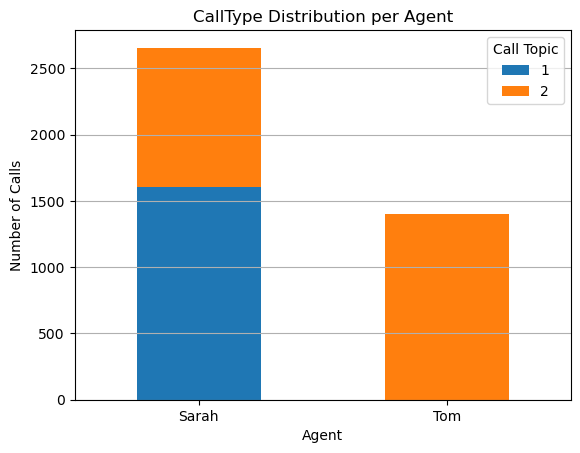

In [19]:
# Displaying Call type dristribution between agents
call_type_dist = df.groupby(["Agent", "CallType"]).size().unstack()
call_type_dist.plot(kind="bar", stacked=True)
    
plt.xlabel("Agent")
plt.ylabel("Number of Calls")
plt.title("CallType Distribution per Agent")
plt.xticks(rotation=0) 
plt.legend(title="Call Topic", loc='upper right')
plt.grid(axis='y')
plt.show()


The dataset validates our assumption of having two-servers system one with ability to handle one type of call and other one handling both type of calls. Here, we consider the **Admin**, **Streaming** and **Technical Support** to be one type of call and **Contract related** and **Payment Related** Calls to another type of calls.

**Checking some other visualisation to understand the dataset in more details**

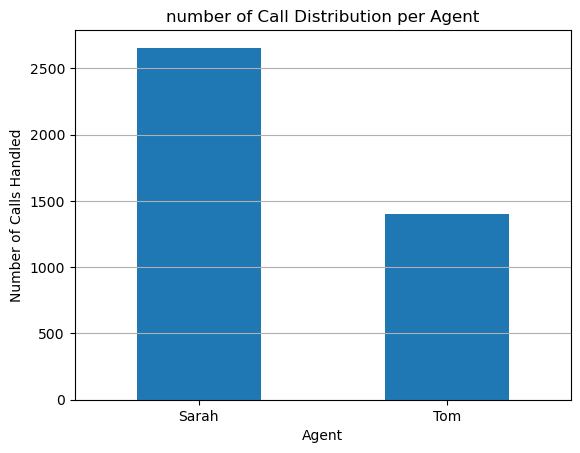

In [20]:
# Ploting number of calls handled per agent
df['Agent'].value_counts().plot(kind='bar')
plt.xlabel("Agent")
plt.ylabel("Number of Calls Handled")
plt.title("number of Call Distribution per Agent")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

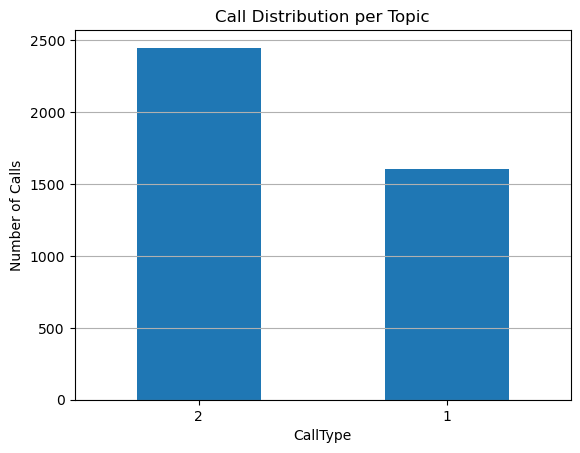

In [21]:
# Ploting call distribution per call type
df['CallType'].value_counts().plot(kind='bar')

plt.xlabel("CallType")
plt.ylabel("Number of Calls")
plt.title("Call Distribution per Topic")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


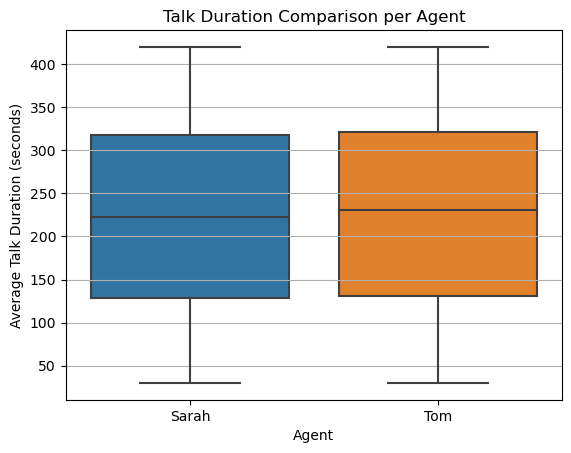

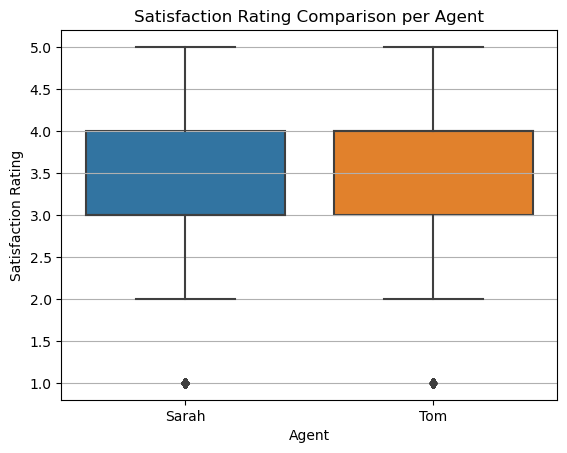

In [22]:
# Comparing Average Talk Duration per Agent
 
sns.boxplot(x=df["Agent"], y=df["AvgTalkDuration"])
plt.xlabel("Agent")
plt.ylabel("Average Talk Duration (seconds)")
plt.title("Talk Duration Comparison per Agent")
plt.grid(axis='y')
plt.show()

# Comparing Satisfaction Rate per Agent
 
sns.boxplot(x=df["Agent"], y=df["Satisfaction rating"])
plt.xlabel("Agent")
plt.ylabel("Satisfaction Rating")
plt.title("Satisfaction Rating Comparison per Agent")
plt.grid(axis='y')
plt.show()


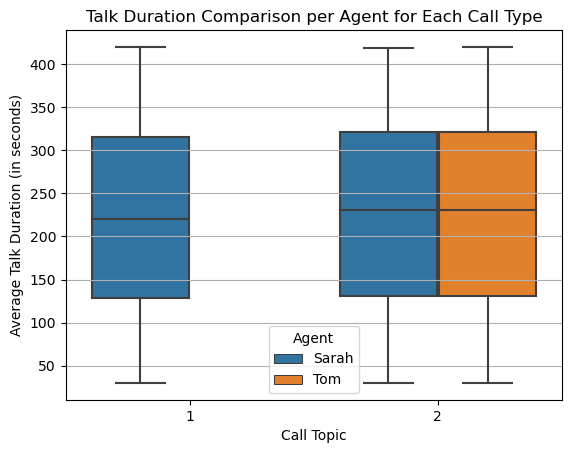

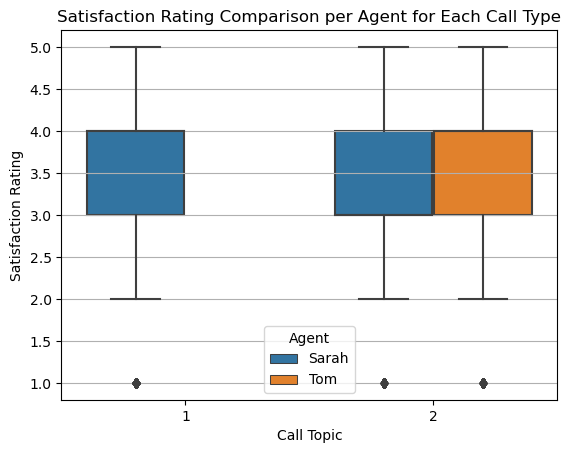

In [23]:
# Compare Average Talk Duration per Agent for Each Call Topic
sns.boxplot(x=df["CallType"], y=df["AvgTalkDuration"], hue=df["Agent"])
plt.xlabel("Call Topic")
plt.ylabel("Average Talk Duration (in seconds)")
plt.title("Talk Duration Comparison per Agent for Each Call Type")
plt.xticks(rotation=0)
plt.legend(title="Agent")
plt.grid(axis='y')
plt.show()

# Compare Satisfaction Ratings per Agent for Each Call Topic
sns.boxplot(x=df["CallType"], y=df["Satisfaction rating"], hue=df["Agent"])
plt.xlabel("Call Topic")
plt.ylabel("Satisfaction Rating")
plt.title("Satisfaction Rating Comparison per Agent for Each Call Type")
plt.xticks(rotation=0)
plt.legend(title="Agent")
plt.grid(axis='y')
plt.show()


Resolved Calls (%)
 Agent
Sarah    72.533496
Tom      73.659674
Name: Resolved, dtype: float64

Average Speed of Answer (seconds)
 Agent
Sarah    67.666792
Tom      67.243205
Name: Speed of answer in seconds, dtype: float64


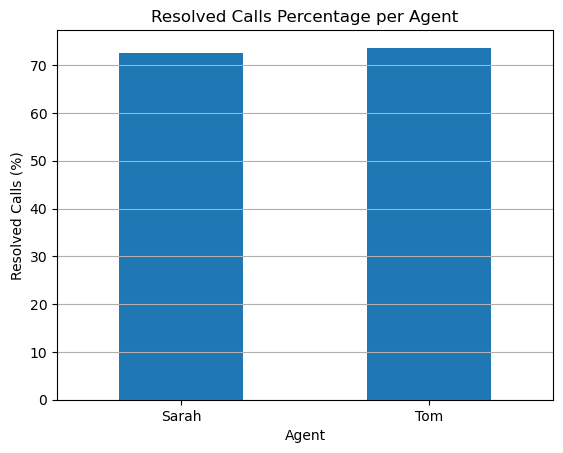

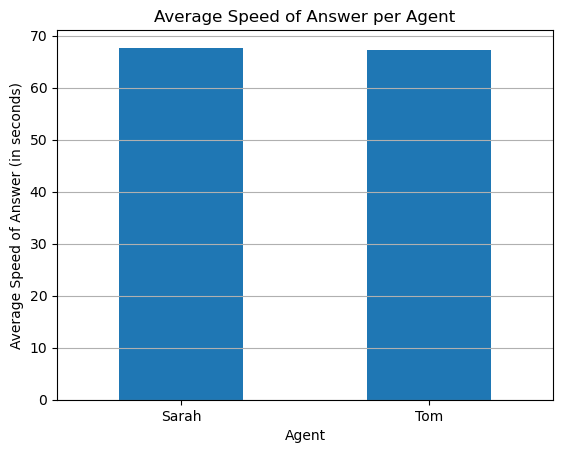

In [13]:
# Calculating the percentage of resolved calls per agent
call_resolved_per_agent = df.groupby("Agent")["Resolved"].mean() * 100

# Calculating the average speed of answer per agent
avg_speed_of_answer_per_agent = df.groupby("Agent")["Speed of answer in seconds"].mean()

print(f'Resolved Calls (%)\n {call_resolved_per_agent}')
print(f'\nAverage Speed of Answer (seconds)\n {avg_speed_of_answer_per_agent}')

# Ploting the Resolved Calls Percentage per Agent

call_resolved_per_agent.plot(kind="bar")
plt.xlabel("Agent")
plt.ylabel("Resolved Calls (%)")
plt.title("Resolved Calls Percentage per Agent")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

# Ploting the Average Speed of Answer per Agent
avg_speed_of_answer_per_agent.plot(kind="bar")
plt.xlabel("Agent")
plt.ylabel("Average Speed of Answer (in seconds)")
plt.title("Average Speed of Answer per Agent")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()



### Testing Poison Arrival

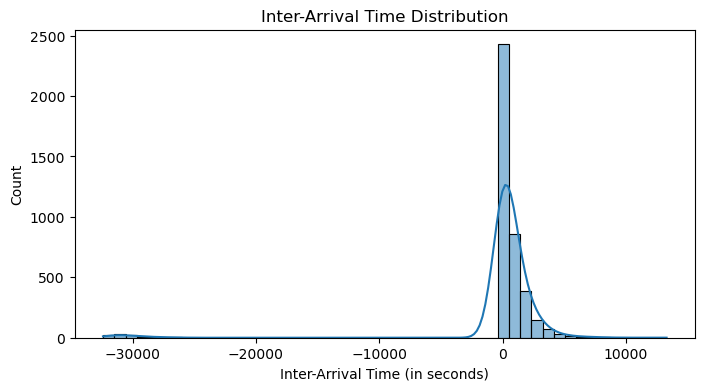

In [25]:
# Computing inter-arrival times
df["InterArrivalTime"] = df["Time"].diff().dt.total_seconds()

# Checking if it follows exponential distribution
plt.figure(figsize=(8,4))
sns.histplot(df["InterArrivalTime"], bins=50, kde=True)
plt.xlabel("Inter-Arrival Time (in seconds)")
plt.title("Inter-Arrival Time Distribution")
plt.show()


**Interpreting the plot**

**Unexpected Negative Values:** Some inter-arrival times are negative, which is not physically possible. This suggests time ordering issues or incorrect timestamp conversions.

**Sharp Peak Near Zero:** Most inter-arrival times are very close to zero. This suggests highly clustered arrivals, which might indicate bursts of calls rather than following a Poisson-like random process.

**Highly Skewed Distribution:** The right tail (positive values) is expected since inter-arrival times should be exponentially distributed. The left tail (negative values) is incorrect and needs fixing.

*Poisson processes should not have negative inter-arrival times.*

*The distribution should be strictly positive and resemble an exponential decay.*

###### This supports the non-Poisson nature of the call arrivals.


To fix this we'll sort the date and time and remove negative Inter-Arrival Times

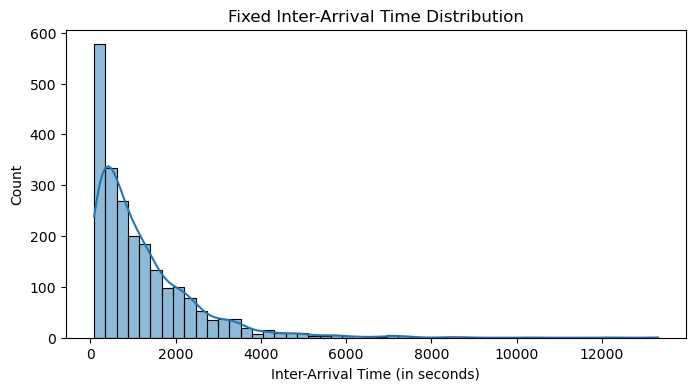

In [26]:
# Ensuring the dataset is sorted by Date and Time
df = df.sort_values(by=["Date", "Time"])

# Dropping NaN values (first call of each day)
df = df.dropna(subset=["InterArrivalTime"])

# Removing negative inter-arrival times (if any remain due to errors)
df = df[df["InterArrivalTime"] > 0]

# Againg plotting to check exponential distribution
plt.figure(figsize=(8, 4))
sns.histplot(df["InterArrivalTime"], bins=50, kde=True)
plt.xlabel("Inter-Arrival Time (in seconds)")
plt.title("Fixed Inter-Arrival Time Distribution")
plt.show()


**Interpreting the plot**

**Right-Skewed Distribution (Exponential Shape):** Most inter-arrival times are close to zero but gradually decrease, forming a long tail. This closely resembles an exponential distribution, which is expected for a Poisson arrival process.

**Sharp Peak Near Zero:** A high concentration of calls occurs with short inter-arrival times. This suggests bursty call arrivals, which is common in real-world call centers.

**Long Tail (High Variability in Arrival Times):** Some inter-arrival times exceed 12,000 seconds (~3.3 hours). This suggests periods of low activity where no calls arrive for long durations. The presence of a long tail still aligns with an exponential process.


###### The shape matches an exponential distribution, which suggests a Poisson arrival process. However, the highly clustered arrivals near zero again denies the Poisson arrival.


In [27]:
# Performing Kolmogorov-Smirnov (KS) test for  validation

# Estimating lambda (1/mean inter-arrival time) 
lambda_ = 1 / df["InterArrivalTime"].mean()

# Perform KS test for exponential distribution
ks_stat, p_value = stats.kstest(df["InterArrivalTime"], 'expon', args=(0, 1/lambda_))

# Print KS test results
print(f'KS Statistics: {ks_stat} and p-Value: {p_value}') 


KS Statistics: 0.06815142625041032 and p-Value: 1.7062037422317071e-09


**Interpreting the result**

The KS Statistic (0.0682) is low, suggesting some similarity between the observed data and an exponential distribution.

The P-value (1.7062e-10) is extremely small (< 0.05), meaning we reject the null hypothesis that the data follows a perfect exponential distribution.

**This implies deviations from the expected Poisson process.**
**In simple terms, call arrivals are not perfectly Poisson, though they may be close.**

Again, Checking If Mean ≈ Variance (Poisson Property)

In [28]:
# Counting arrivals per time interval 
df["Minute"] = df["Time"].dt.floor("T")  # Round to nearest time interval
arrival_counts = df.groupby("Minute").size()

# Computing mean and variance
arrival_mean = np.mean(arrival_counts)
arrival_variance = np.var(arrival_counts)

print(f"Mean of Arrivals: {arrival_mean:.2f}")
print(f"Variance of Arrivals: {arrival_variance:.2f}")

# Checking if mean ≈ variance
if abs(arrival_mean - arrival_variance) / arrival_mean < 0.05:  # Allowing 5% deviation
    print("Mean is very close to variance. The Poisson assumption is likely to be valid.")
else:
    print("Mean and variance has significant difference. The Poisson assumption may not be valid.")


Mean of Arrivals: 6.04
Variance of Arrivals: 6.09
Mean is very close to variance. The Poisson assumption is likely to be valid.


#### Checking If Arrival Rates Change Over Time

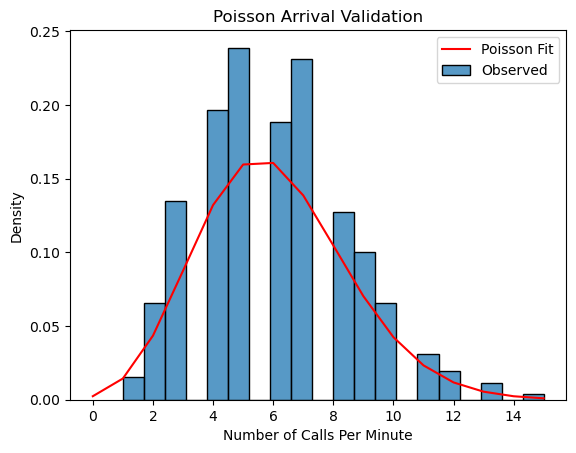

In [29]:
# Counting arrivals per time interval (every minute)
df["Minute"] = df["Time"].dt.floor("T")  # Round to nearest minute
call_counts = df.groupby("Minute").size()

# Fit a Poisson distribution
lambda_hat = np.mean(call_counts)  # Estimated arrival rate
poisson_fit = poisson.pmf(k=np.arange(0, max(call_counts)+1), mu=lambda_hat)
# Reference: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html

# actual vs Poisson distribution
sns.histplot(call_counts, bins=20, stat="density", label="Observed")
plt.plot(np.arange(0, max(call_counts)+1), poisson_fit, label="Poisson Fit" , color = 'red')
plt.xlabel("Number of Calls Per Minute")
plt.ylabel("Density")
plt.legend()
plt.title("Poisson Arrival Validation")
plt.show()


**Interpreting the plot**

**Observed Data (Blue Histogram) vs. Poisson Fit (Red Curve)**
 
 The blue bars show the actual distribution of call arrivals per minute.
The red line represents the theoretical Poisson fit based on the estimated arrival rate (λ̂).

**Good Fit in the Middle Range (4-8 Calls/Minute)**

The Poisson fit closely follows the observed data for moderate call volumes (4-8 calls per minute).
This suggests that the Poisson assumption holds reasonably well in normal conditions.

**Deviations at the Tails (Low & High Arrivals)**

Underestimation of low call volumes (1-2 calls per minute): The Poisson fit assigns lower probabilities than observed.
Overestimation of extreme values (12+ calls per minute): The Poisson model expects fewer extreme bursts than actually occur.
This suggests some clustering or time-dependent fluctuations in call arrivals.

**Summary:** The general shape matches a Poisson distribution, meaning call arrivals are approximately Poisson. However, the tails show deviations, which could indicate time-dependent variations in call arrival rates.

**Upon performing multiple test we can conclude that the call arrival does not fully follow the Poisson arrival process.**

### Finite Horizon Test:

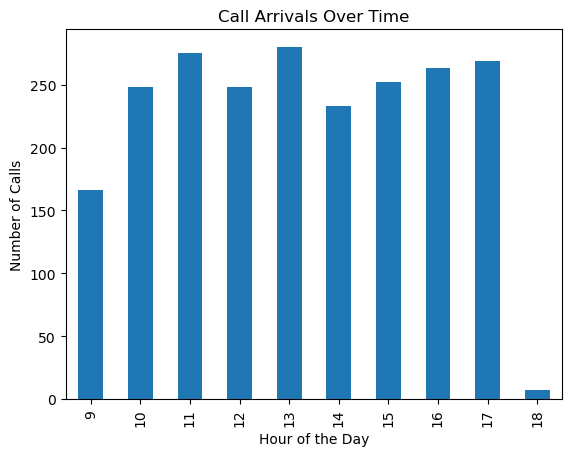

In [30]:
#Call arrivals over time
df.groupby(df["Time"].dt.hour).size().plot(kind="bar")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Calls")
plt.title("Call Arrivals Over Time")
plt.show()


**The calls drop to zero near the system end time (T). Therefore, the finite horizon test is valid.**

##### Summary: From the above analysis we can conclude that our assumption of Poisson arrival is not valid for the dataset. Hence, we will use advanced reinforcement learning (Implement Proximal Policy Optimization (PPO)) for our dataset.

### Implement Proximal Policy Optimization (PPO)
#### Create the Call Center Environment

In [31]:
import gymnasium as gym
from gymnasium import spaces
from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.evaluation import evaluate_policy

In [32]:
# Defining the environment inline
class CallCenterEnv(gym.Env):
    def __init__(self, lambda_1=0.5, lambda_2=0.3, mu_1=1, mu_2=2, max_queue=5, max_time=30): 
        # Same variables as project part A
        super(CallCenterEnv, self).__init__()

        self.lambda_1 = lambda_1
        self.lambda_2 = lambda_2
        self.mu_1 = mu_1
        self.mu_2 = mu_2
        self.max_queue = max_queue
        self.max_time = max_time

        self.action_space = spaces.Discrete(3)
        self.observation_space = spaces.MultiDiscrete([self.max_queue + 1, self.max_queue + 1, 2, 2])
        self.reset()

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.n1 = 0
        self.n2 = 0
        self.S1 = 0
        self.S2 = 0
        self.t = 0
        self.server1_time = 0
        self.server2_time = 0
        return self._get_state(), {}

    def _get_state(self):
        return np.array([self.n1, self.n2, self.S1, self.S2], dtype=int)

    def _reward(self):
        return -(self.n1 + self.n2)

    def step(self, action):
        if self.server1_time > 0:
            self.server1_time -= 1
        if self.server2_time > 0:
            self.server2_time -= 1
        if self.server1_time <= 0:
            self.S1 = 0
        if self.server2_time <= 0:
            self.S2 = 0

        if action == 0: # action == 'a1'
            if self.n1 > 0 and self.S1 == 0:
                self.n1 -= 1
                self.S1 = 1
                self.server1_time = int(np.random.exponential(1 / self.mu_1))
            elif self.n1 > 0 and self.S2 == 0:
                self.n1 -= 1
                self.S2 = 1
                self.server2_time = int(np.random.exponential(1 / self.mu_1))
        elif action == 1: #action == 'a2'
            if self.n2 > 0 and self.S2 == 0:
                self.n2 -= 1
                self.S2 = 1
                self.server2_time = int(np.random.exponential(1 / self.mu_2))
        elif action == 2: #action == 'a1_a2'
            if self.n1 > 0 and self.S1 == 0:
                self.n1 -= 1
                self.S1 = 1
                self.server1_time = int(np.random.exponential(1 / self.mu_1))
            if self.n2 > 0 and self.S2 == 0:
                self.n2 -= 1
                self.S2 = 1
                self.server2_time = int(np.random.exponential(1 / self.mu_2))

        arrivals_1 = np.random.poisson(self.lambda_1)
        arrivals_2 = np.random.poisson(self.lambda_2)
        self.n1 = min(self.n1 + arrivals_1, self.max_queue)
        self.n2 = min(self.n2 + arrivals_2, self.max_queue)

        reward = self._reward()
        self.t += 1
        terminated = self.t >= self.max_time
        truncated = False
        return self._get_state(), self._reward(), terminated, truncated, {}
    
        print(f"Step {self.t}: Assigned action {action}, Server1: {self.S1}, Server2: {self.S2}")


    def render(self, mode="human"):
        print(f"Time: {self.t} | Queue1: {self.n1}, Queue2: {self.n2} | Server1: {self.S1}, Server2: {self.S2}")

        
# Reference: https://gymnasium.farama.org/
# Reference: https://gymnasium.farama.org/introduction/basic_usage/
# Reference: https://gymnasium.farama.org/introduction/create_custom_env/
# Reference: https://gymnasium.farama.org/tutorials/gymnasium_basics/environment_creation/


#### Testing the Environment

In [33]:
env = CallCenterEnv(max_time=30)

obs, _ = env.reset()
done = False

while not done:
    action = env.action_space.sample()  # random action
    obs, reward, terminated, truncated, _ = env.step(action)
    done = terminated or truncated
    env.render()


Time: 1 | Queue1: 0, Queue2: 1 | Server1: 0, Server2: 0
Time: 2 | Queue1: 0, Queue2: 0 | Server1: 0, Server2: 1
Time: 3 | Queue1: 0, Queue2: 1 | Server1: 0, Server2: 0
Time: 4 | Queue1: 0, Queue2: 0 | Server1: 0, Server2: 1
Time: 5 | Queue1: 1, Queue2: 0 | Server1: 0, Server2: 0
Time: 6 | Queue1: 1, Queue2: 1 | Server1: 0, Server2: 0
Time: 7 | Queue1: 1, Queue2: 0 | Server1: 0, Server2: 1
Time: 8 | Queue1: 1, Queue2: 0 | Server1: 1, Server2: 0
Time: 9 | Queue1: 0, Queue2: 1 | Server1: 1, Server2: 1
Time: 10 | Queue1: 1, Queue2: 1 | Server1: 1, Server2: 0
Time: 11 | Queue1: 1, Queue2: 1 | Server1: 1, Server2: 1
Time: 12 | Queue1: 0, Queue2: 3 | Server1: 1, Server2: 1
Time: 13 | Queue1: 0, Queue2: 3 | Server1: 0, Server2: 1
Time: 14 | Queue1: 0, Queue2: 2 | Server1: 0, Server2: 1
Time: 15 | Queue1: 0, Queue2: 2 | Server1: 0, Server2: 1
Time: 16 | Queue1: 0, Queue2: 2 | Server1: 0, Server2: 0
Time: 17 | Queue1: 2, Queue2: 1 | Server1: 0, Server2: 1
Time: 18 | Queue1: 2, Queue2: 0 | Server

#### Training PPO with our Dataset

In [34]:
# Creating the environment
env = CallCenterEnv()
check_env(env)

# Training PPO model
model = PPO("MlpPolicy", env, learning_rate=1e-4, verbose=1)
model.learn(total_timesteps=500000)

# Save model
model.save("ppo_callcenter")

# Evaluate PPO model
mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=5)
print(f"Mean reward: {mean_reward:.2f} ± {std_reward:.2f}")

# Test run
obs, _ = env.reset()
rewards = []

while True:
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, terminated, truncated, _ = env.step(action)
    rewards.append(reward)
    if terminated or truncated:
        break

# Reference: https://stable-baselines3.readthedocs.io/en/master/modules/ppo.html

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 30       |
|    ep_rew_mean     | -67.6    |
| time/              |          |
|    fps             | 1009     |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 30          |
|    ep_rew_mean          | -57.2       |
| time/                   |             |
|    fps                  | 727         |
|    iterations           | 2           |
|    time_elapsed         | 5           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.008775808 |
|    clip_fraction        | 0.00459     |
|    clip_range           | 0.2         |
|    entropy_loss   

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 30           |
|    ep_rew_mean          | -42          |
| time/                   |              |
|    fps                  | 551          |
|    iterations           | 11           |
|    time_elapsed         | 40           |
|    total_timesteps      | 22528        |
| train/                  |              |
|    approx_kl            | 0.0068819243 |
|    clip_fraction        | 0.0296       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.871       |
|    explained_variance   | 0.000326     |
|    learning_rate        | 0.0001       |
|    loss                 | 66.8         |
|    n_updates            | 100          |
|    policy_gradient_loss | -0.0049      |
|    value_loss           | 142          |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 30           |
|    ep_rew_mean          | -41          |
| time/                   |              |
|    fps                  | 554          |
|    iterations           | 21           |
|    time_elapsed         | 77           |
|    total_timesteps      | 43008        |
| train/                  |              |
|    approx_kl            | 0.0014199445 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.665       |
|    explained_variance   | 0.0147       |
|    learning_rate        | 0.0001       |
|    loss                 | 78.9         |
|    n_updates            | 200          |
|    policy_gradient_loss | -0.000779    |
|    value_loss           | 141          |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 30           |
|    ep_rew_mean          | -35.4        |
| time/                   |              |
|    fps                  | 557          |
|    iterations           | 31           |
|    time_elapsed         | 113          |
|    total_timesteps      | 63488        |
| train/                  |              |
|    approx_kl            | 0.0076645194 |
|    clip_fraction        | 0.0479       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.507       |
|    explained_variance   | 0.00952      |
|    learning_rate        | 0.0001       |
|    loss                 | 44.8         |
|    n_updates            | 300          |
|    policy_gradient_loss | -0.00493     |
|    value_loss           | 103          |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 30           |
|    ep_rew_mean          | -36.6        |
| time/                   |              |
|    fps                  | 541          |
|    iterations           | 41           |
|    time_elapsed         | 155          |
|    total_timesteps      | 83968        |
| train/                  |              |
|    approx_kl            | 0.0018257307 |
|    clip_fraction        | 0.00757      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.471       |
|    explained_variance   | 0.0437       |
|    learning_rate        | 0.0001       |
|    loss                 | 95.2         |
|    n_updates            | 400          |
|    policy_gradient_loss | -0.00123     |
|    value_loss           | 131          |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 30           |
|    ep_rew_mean          | -35          |
| time/                   |              |
|    fps                  | 531          |
|    iterations           | 51           |
|    time_elapsed         | 196          |
|    total_timesteps      | 104448       |
| train/                  |              |
|    approx_kl            | 0.0016477292 |
|    clip_fraction        | 0.0275       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.405       |
|    explained_variance   | 0.065        |
|    learning_rate        | 0.0001       |
|    loss                 | 55.3         |
|    n_updates            | 500          |
|    policy_gradient_loss | -0.00287     |
|    value_loss           | 98.3         |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 30           |
|    ep_rew_mean          | -35.6        |
| time/                   |              |
|    fps                  | 540          |
|    iterations           | 61           |
|    time_elapsed         | 231          |
|    total_timesteps      | 124928       |
| train/                  |              |
|    approx_kl            | 0.0048597637 |
|    clip_fraction        | 0.0298       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.368       |
|    explained_variance   | 0.0454       |
|    learning_rate        | 0.0001       |
|    loss                 | 63.5         |
|    n_updates            | 600          |
|    policy_gradient_loss | -0.00326     |
|    value_loss           | 120          |
------------------------------------------
-------------------------------------------
| rollout/                |               |
|    ep_l

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 30           |
|    ep_rew_mean          | -35.6        |
| time/                   |              |
|    fps                  | 545          |
|    iterations           | 71           |
|    time_elapsed         | 266          |
|    total_timesteps      | 145408       |
| train/                  |              |
|    approx_kl            | 0.0022952924 |
|    clip_fraction        | 0.013        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.383       |
|    explained_variance   | 0.0515       |
|    learning_rate        | 0.0001       |
|    loss                 | 53.1         |
|    n_updates            | 700          |
|    policy_gradient_loss | -0.00181     |
|    value_loss           | 96.2         |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 30           |
|    ep_rew_mean          | -32.3        |
| time/                   |              |
|    fps                  | 546          |
|    iterations           | 81           |
|    time_elapsed         | 303          |
|    total_timesteps      | 165888       |
| train/                  |              |
|    approx_kl            | 0.0035378952 |
|    clip_fraction        | 0.0276       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.279       |
|    explained_variance   | 0.0242       |
|    learning_rate        | 0.0001       |
|    loss                 | 55.1         |
|    n_updates            | 800          |
|    policy_gradient_loss | -0.00201     |
|    value_loss           | 106          |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 30            |
|    ep_rew_mean          | -33.8         |
| time/                   |               |
|    fps                  | 542           |
|    iterations           | 91            |
|    time_elapsed         | 343           |
|    total_timesteps      | 186368        |
| train/                  |               |
|    approx_kl            | 0.00055445987 |
|    clip_fraction        | 0.00454       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.219        |
|    explained_variance   | 0.0382        |
|    learning_rate        | 0.0001        |
|    loss                 | 29            |
|    n_updates            | 900           |
|    policy_gradient_loss | -0.00057      |
|    value_loss           | 95.3          |
-------------------------------------------
------------------------------------------
| rollout/                |      

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 30          |
|    ep_rew_mean          | -31.4       |
| time/                   |             |
|    fps                  | 540         |
|    iterations           | 100         |
|    time_elapsed         | 379         |
|    total_timesteps      | 204800      |
| train/                  |             |
|    approx_kl            | 0.001208705 |
|    clip_fraction        | 0.02        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.156      |
|    explained_variance   | 0.0515      |
|    learning_rate        | 0.0001      |
|    loss                 | 63.7        |
|    n_updates            | 990         |
|    policy_gradient_loss | -0.00121    |
|    value_loss           | 99.8        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 30    

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 30           |
|    ep_rew_mean          | -36          |
| time/                   |              |
|    fps                  | 542          |
|    iterations           | 110          |
|    time_elapsed         | 414          |
|    total_timesteps      | 225280       |
| train/                  |              |
|    approx_kl            | 0.0008999284 |
|    clip_fraction        | 0.0121       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.18        |
|    explained_variance   | 0.0115       |
|    learning_rate        | 0.0001       |
|    loss                 | 55.5         |
|    n_updates            | 1090         |
|    policy_gradient_loss | -0.00151     |
|    value_loss           | 103          |
------------------------------------------
-------------------------------------------
| rollout/                |               |
|    ep_l

-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 30            |
|    ep_rew_mean          | -34.9         |
| time/                   |               |
|    fps                  | 538           |
|    iterations           | 120           |
|    time_elapsed         | 456           |
|    total_timesteps      | 245760        |
| train/                  |               |
|    approx_kl            | 0.00027437563 |
|    clip_fraction        | 0.00488       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.148        |
|    explained_variance   | 0.019         |
|    learning_rate        | 0.0001        |
|    loss                 | 53.4          |
|    n_updates            | 1190          |
|    policy_gradient_loss | -0.000732     |
|    value_loss           | 106           |
-------------------------------------------
-------------------------------------------
| rollout/                |     

-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 30            |
|    ep_rew_mean          | -34.5         |
| time/                   |               |
|    fps                  | 537           |
|    iterations           | 130           |
|    time_elapsed         | 495           |
|    total_timesteps      | 266240        |
| train/                  |               |
|    approx_kl            | 0.00050304725 |
|    clip_fraction        | 0.0105        |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.196        |
|    explained_variance   | 0.0363        |
|    learning_rate        | 0.0001        |
|    loss                 | 40.2          |
|    n_updates            | 1290          |
|    policy_gradient_loss | -0.00146      |
|    value_loss           | 95.9          |
-------------------------------------------
-------------------------------------------
| rollout/                |     

-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 30            |
|    ep_rew_mean          | -35.6         |
| time/                   |               |
|    fps                  | 534           |
|    iterations           | 140           |
|    time_elapsed         | 536           |
|    total_timesteps      | 286720        |
| train/                  |               |
|    approx_kl            | 0.00090221595 |
|    clip_fraction        | 0.00557       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.233        |
|    explained_variance   | 0.0589        |
|    learning_rate        | 0.0001        |
|    loss                 | 55.8          |
|    n_updates            | 1390          |
|    policy_gradient_loss | -0.000817     |
|    value_loss           | 105           |
-------------------------------------------
------------------------------------------
| rollout/                |      

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 30           |
|    ep_rew_mean          | -35.1        |
| time/                   |              |
|    fps                  | 533          |
|    iterations           | 150          |
|    time_elapsed         | 575          |
|    total_timesteps      | 307200       |
| train/                  |              |
|    approx_kl            | 0.0017486666 |
|    clip_fraction        | 0.0234       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.171       |
|    explained_variance   | 0.0368       |
|    learning_rate        | 0.0001       |
|    loss                 | 58.1         |
|    n_updates            | 1490         |
|    policy_gradient_loss | -0.00192     |
|    value_loss           | 111          |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 30           |
|    ep_rew_mean          | -35.9        |
| time/                   |              |
|    fps                  | 536          |
|    iterations           | 160          |
|    time_elapsed         | 611          |
|    total_timesteps      | 327680       |
| train/                  |              |
|    approx_kl            | 0.0007708088 |
|    clip_fraction        | 0.00923      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.158       |
|    explained_variance   | 0.0421       |
|    learning_rate        | 0.0001       |
|    loss                 | 42.6         |
|    n_updates            | 1590         |
|    policy_gradient_loss | -0.000928    |
|    value_loss           | 108          |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 30           |
|    ep_rew_mean          | -33.8        |
| time/                   |              |
|    fps                  | 535          |
|    iterations           | 170          |
|    time_elapsed         | 650          |
|    total_timesteps      | 348160       |
| train/                  |              |
|    approx_kl            | 0.0009493079 |
|    clip_fraction        | 0.00454      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.134       |
|    explained_variance   | 0.0538       |
|    learning_rate        | 0.0001       |
|    loss                 | 65           |
|    n_updates            | 1690         |
|    policy_gradient_loss | -0.000777    |
|    value_loss           | 111          |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 30           |
|    ep_rew_mean          | -33          |
| time/                   |              |
|    fps                  | 533          |
|    iterations           | 180          |
|    time_elapsed         | 691          |
|    total_timesteps      | 368640       |
| train/                  |              |
|    approx_kl            | 0.0007985034 |
|    clip_fraction        | 0.00835      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.143       |
|    explained_variance   | 0.0576       |
|    learning_rate        | 0.0001       |
|    loss                 | 45.1         |
|    n_updates            | 1790         |
|    policy_gradient_loss | -0.0006      |
|    value_loss           | 106          |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 30           |
|    ep_rew_mean          | -33.6        |
| time/                   |              |
|    fps                  | 530          |
|    iterations           | 190          |
|    time_elapsed         | 732          |
|    total_timesteps      | 389120       |
| train/                  |              |
|    approx_kl            | 0.0010655469 |
|    clip_fraction        | 0.00957      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.152       |
|    explained_variance   | 0.0198       |
|    learning_rate        | 0.0001       |
|    loss                 | 38.4         |
|    n_updates            | 1890         |
|    policy_gradient_loss | -0.000934    |
|    value_loss           | 90.5         |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 30           |
|    ep_rew_mean          | -33.1        |
| time/                   |              |
|    fps                  | 528          |
|    iterations           | 200          |
|    time_elapsed         | 774          |
|    total_timesteps      | 409600       |
| train/                  |              |
|    approx_kl            | 0.0005921957 |
|    clip_fraction        | 0.00493      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.156       |
|    explained_variance   | 0.045        |
|    learning_rate        | 0.0001       |
|    loss                 | 45.4         |
|    n_updates            | 1990         |
|    policy_gradient_loss | -0.000501    |
|    value_loss           | 107          |
------------------------------------------
-------------------------------------------
| rollout/                |               |
|    ep_l

-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 30            |
|    ep_rew_mean          | -32.1         |
| time/                   |               |
|    fps                  | 529           |
|    iterations           | 209           |
|    time_elapsed         | 809           |
|    total_timesteps      | 428032        |
| train/                  |               |
|    approx_kl            | 0.00084094296 |
|    clip_fraction        | 0.00684       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.136        |
|    explained_variance   | 0.0179        |
|    learning_rate        | 0.0001        |
|    loss                 | 37.8          |
|    n_updates            | 2080          |
|    policy_gradient_loss | -0.000595     |
|    value_loss           | 90.7          |
-------------------------------------------
------------------------------------------
| rollout/                |      

-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 30            |
|    ep_rew_mean          | -33.9         |
| time/                   |               |
|    fps                  | 527           |
|    iterations           | 218           |
|    time_elapsed         | 846           |
|    total_timesteps      | 446464        |
| train/                  |               |
|    approx_kl            | 0.00035044726 |
|    clip_fraction        | 0.00532       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.113        |
|    explained_variance   | 0.0612        |
|    learning_rate        | 0.0001        |
|    loss                 | 51.4          |
|    n_updates            | 2170          |
|    policy_gradient_loss | -0.00071      |
|    value_loss           | 108           |
-------------------------------------------
-------------------------------------------
| rollout/                |     

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 30           |
|    ep_rew_mean          | -34.4        |
| time/                   |              |
|    fps                  | 527          |
|    iterations           | 227          |
|    time_elapsed         | 882          |
|    total_timesteps      | 464896       |
| train/                  |              |
|    approx_kl            | 0.0008829654 |
|    clip_fraction        | 0.00737      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.104       |
|    explained_variance   | 0.0629       |
|    learning_rate        | 0.0001       |
|    loss                 | 34           |
|    n_updates            | 2260         |
|    policy_gradient_loss | -0.000513    |
|    value_loss           | 95.3         |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 30            |
|    ep_rew_mean          | -36.8         |
| time/                   |               |
|    fps                  | 525           |
|    iterations           | 236           |
|    time_elapsed         | 919           |
|    total_timesteps      | 483328        |
| train/                  |               |
|    approx_kl            | 0.00063233374 |
|    clip_fraction        | 0.00239       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0758       |
|    explained_variance   | 0.0538        |
|    learning_rate        | 0.0001        |
|    loss                 | 62.3          |
|    n_updates            | 2350          |
|    policy_gradient_loss | -0.000249     |
|    value_loss           | 112           |
-------------------------------------------
-------------------------------------------
| rollout/                |     

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 30           |
|    ep_rew_mean          | -31.9        |
| time/                   |              |
|    fps                  | 523          |
|    iterations           | 245          |
|    time_elapsed         | 959          |
|    total_timesteps      | 501760       |
| train/                  |              |
|    approx_kl            | 0.0009950519 |
|    clip_fraction        | 0.0171       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0776      |
|    explained_variance   | -0.000962    |
|    learning_rate        | 0.0001       |
|    loss                 | 51           |
|    n_updates            | 2440         |
|    policy_gradient_loss | -0.00157     |
|    value_loss           | 106          |
------------------------------------------
Mean reward: -34.40 ± 8.59


C:\Users\User\anaconda3\lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


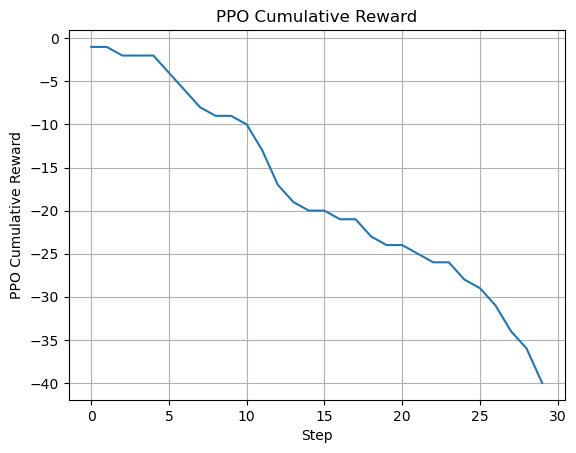

In [49]:
# Plotting cumulative reward
plt.plot(np.cumsum(rewards))
plt.title("PPO Cumulative Reward")
plt.xlabel("Step")
plt.ylabel("PPO Cumulative Reward")
plt.grid(True)
plt.show()

#### Reward per episode

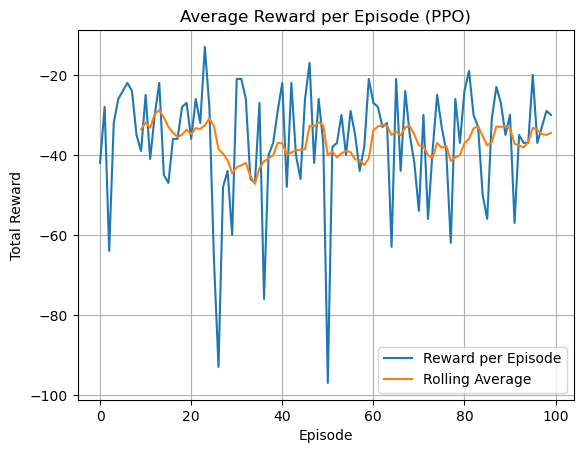

In [36]:
episode_rewards = []
num_episodes = 100  # ploting for 100 episodes

for episode in range(num_episodes):
    obs, _ = env.reset()
    done = False
    total_reward = 0

    while not done:
        action, _ = model.predict(obs, deterministic=True)
        obs, reward, terminated, truncated, _ = env.step(action)
        total_reward += reward
        done = terminated or truncated

    episode_rewards.append(total_reward)

# Rewards using rolling average
rolling_avg = pd.Series(episode_rewards).rolling(window=10).mean()
# Reference: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html

# Ploting reward per episode with rolling average
plt.plot(episode_rewards, label='Reward per Episode')
plt.plot(rolling_avg, label='Rolling Average')
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Average Reward per Episode (PPO)")
plt.grid(True)
plt.legend()
plt.show()


#### Summary

The rolling average reward (orange) has improved over time : trending from ~ -40 to ~ -30.

Stabilised in the later episodes (70–100), which is a great sign of convergence.

#### Comparing PPO with VI

In [37]:
# Evaluating PPO model
env = CallCenterEnv(max_time=30)
obs, _ = env.reset()
ppo_rewards = []
ppo_q1_lengths, ppo_q2_lengths, ppo_time_steps = [], [], []
ppo_s1_status = []
ppo_s2_status = []

while True:
    n1, n2, S1, S2 = obs
    ppo_q1_lengths.append(n1)
    ppo_q2_lengths.append(n2)
    ppo_time_steps.append(env.t)
    ppo_s1_status.append(S1)
    ppo_s2_status.append(S2)
    
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, terminated, truncated, _ = env.step(action)
    ppo_rewards.append(reward)
    if terminated or truncated:
        break


#### Mathemetical model from part a to obtain optimal policy for simulation using value iteration

In [38]:
# This part of code is from part A
from math import factorial

# Let's define the Parameters
lambda_1 = 0.5  # Arrival rate for type 1 calls
lambda_2 = 0.3  # Arrival rate for type 2 calls
mu_1 = 1      # Service rate for server 1
mu_2 = 2      # Service rate for server 2
T = 30        # Time horizon
M = 5         # Maximum queue size  
gamma = 0.9   # Discount factor
theta = 0.1   # Convergence threshold 

# Poisson PMF function for arrivals
def poisson_pmf(lambda_rate, k, t=1):
    return (lambda_rate * t) ** k * np.exp(-lambda_rate * t) / factorial(k)

# Reward function
def reward(n1, n2):
    return -(n1 + n2)  # Negative of total waiting in both queues

# Let's initialise the state variables
states = [(n1, n2, S1, S2) for n1 in range(M+1) 
          for n2 in range(M+1) 
          for S1 in [0, 1] 
          for S2 in [0, 1]]
actions = ['a1', 'a2', 'a1_a2']  # Actions: a1 -> handle type 1, a2 -> handle type 2

# Value function and policy initialisation
V = {state: 0 for state in states}  # Let's initialise all states' values to 0
policy = {state: None for state in states}  # Let's initialise policy for each state

# Transition function: define how the state changes given an action
def get_next_state(current_state, action, verbose=False):
    n1, n2, S1, S2 = current_state
    
     # Checking if servers are busy 
    if (n2 > 0 and S2 == 1) or (S1 == 1 and S2 == 1): # Since S2 can only handle type 2 calls
        if verbose:
            print("The server is currently busy")
        return current_state  # Return the current state unchanged

 
    # Defining transitions for actions
    if action == 'a1':    
        if n1 > 0 and S1 == 0: # When S1 available for type 1 calls
            return (n1 - 1, n2, 1, S2)  
        elif n1 > 0 and S2 == 0: # When S2 available for type 1 calls
            return (n1 - 1, n2, S1, 1)  
    
    elif action == 'a2':
        if n2 > 0 and S2 == 0: # Only type 2 calls for S2
            return (n1, n2 - 1, S1, 1)
        
    elif action == 'a1_a2':
        if n1 > 0 and S1 == 0 and n2 > 0 and S2 == 0:  # Both servers handle calls
            return (n1 - 1, n2 - 1, 1, 1)
        elif n1 > 1 and S1 == 0 and S2 == 0:
            return (n1 - 2, n2, 1, 1)

    return current_state  # No valid action, return the current state

# Value iteration using Bellman's equation
for _ in range(T):  # Limiting the number of iterations to the time horizon
    delta = 0
    for state in states:
        v = V[state]  # Current value of the state
        n1, n2, S1, S2 = state  # Unpacking the state

        action_values = []  # To store the value of taking each action

        # Skiping updating policy when all queues and servers are empty
        if (n1 == 0 and n2 == 0 and S1 == 0 and S2 == 0):
            policy[state] = "No Specific Action - Just update the queue"
            continue

        for action in actions:
            # Suppressing the "busy" message during value iteration by setting verbose=False
            next_state = get_next_state(state, action, verbose=False)
            
            # Calculating Poisson probabilities for new arrivals (assuming time step = 1)
            arrivals_1 = np.random.poisson(lambda_1)
            arrivals_2 = np.random.poisson(lambda_2)
            prob_arrival_1 = poisson_pmf(lambda_1, arrivals_1)
            prob_arrival_2 = poisson_pmf(lambda_2, arrivals_2)
            
            # Calculating the reward and transition probability weighted value of the next state
            immediate_reward = reward(*state[:2])
            
            # Bellman's equation
            action_value = prob_arrival_1 * prob_arrival_2 * (immediate_reward + gamma * V[next_state])
            action_values.append(action_value) # appending action_value

        # Updating the value of the state with the maximum action value
        if action_values:
            V[state] = max(action_values)
        delta = max(delta, abs(v - V[state]))

    # Convergence check
    if delta < theta:
        break

# Deriving the optimal policy by choosing the action with the maximum expected reward for each state
for state in states:
    best_action = "No Specific Action - Just update the queue"  # Default policy is "NA" when no action can be taken
    best_value = -float('inf')
    n1, n2, S1, S2 = state  # Unpacking the state

    # Skiping updating policy when all queues and servers are empty
    if (n1 == 0 and n2 == 0 and S1 == 0 and S2 == 0):
        policy[state] = "No Specific Action - Just update the queue"
        continue

    for action in actions:
        # Suppressing the "busy" message during policy calculation by setting verbose=False
        next_state = get_next_state(state, action, verbose=False)
        action_value = (reward(*state[:2]) + gamma * V[next_state])
        
        if action_value > best_value:
            best_value = action_value
            best_action = action
    
    policy[state] = best_action

In [39]:
# Define action mapping
action_map = {
    "a1": 0,
    "a2": 1,
    "a1_a2": 2,
    "No Specific Action - Just update the queue": 0
}


#### Simulatting the policy using Value Iteration

In [40]:
def simulate_vi_policy(env, policy, action_map, max_steps=30):
    obs, _ = env.reset()
    
    vi_rewards = []
    vi_q1_lengths, vi_q2_lengths = [], []
    vi_time_steps = []
    vi_s1_status, vi_s2_status = [], []

    while True:
        n1, n2, S1, S2 = obs
        state = (n1, n2, S1, S2)

        # Lookup action from optimal policy
        action_name = policy.get(state, "No Specific Action - Just update the queue")
        action = action_map[action_name]

        # Environment step
        obs, reward, terminated, truncated, _ = env.step(action)

        # Logging metrics
        vi_rewards.append(reward)
        vi_q1_lengths.append(n1)
        vi_q2_lengths.append(n2)
        vi_time_steps.append(env.t)
        vi_s1_status.append(S1)
        vi_s2_status.append(S2)

        if terminated or truncated or env.t >= max_steps:
            break

    return vi_rewards, vi_q1_lengths, vi_q2_lengths, vi_time_steps, vi_s1_status, vi_s2_status


#### Cumulative Reward Comparison

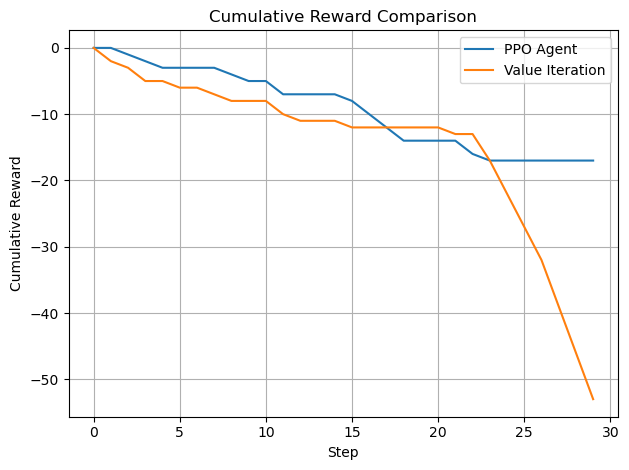

Total PPO Cumulative Reward:   -17.00
Total Value Iteration Reward:    -53.00


In [41]:
vi_rewards, vi_q1_lengths, vi_q2_lengths, vi_time_steps, vi_s1_status, vi_s2_status = simulate_vi_policy(env, policy, action_map)

plt.plot(np.cumsum(ppo_rewards), label="PPO Agent")
plt.plot(np.cumsum(vi_rewards), label="Value Iteration")
plt.title("Cumulative Reward Comparison")
plt.xlabel("Step")
plt.ylabel("Cumulative Reward")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


print(f"Total PPO Cumulative Reward:   {sum(ppo_rewards):.2f}")
print(f"Total Value Iteration Reward:    {sum(vi_rewards):.2f}")

#### Value Iteration Queue Length

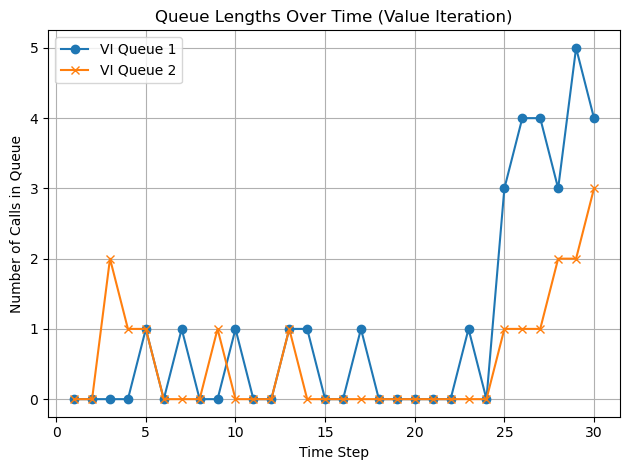

In [42]:
plt.plot(vi_time_steps, vi_q1_lengths, label="VI Queue 1", marker='o')
plt.plot(vi_time_steps, vi_q2_lengths, label="VI Queue 2", marker='x')
plt.title("Queue Lengths Over Time (Value Iteration)")
plt.xlabel("Time Step")
plt.ylabel("Number of Calls in Queue")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#### PPO Queue Length

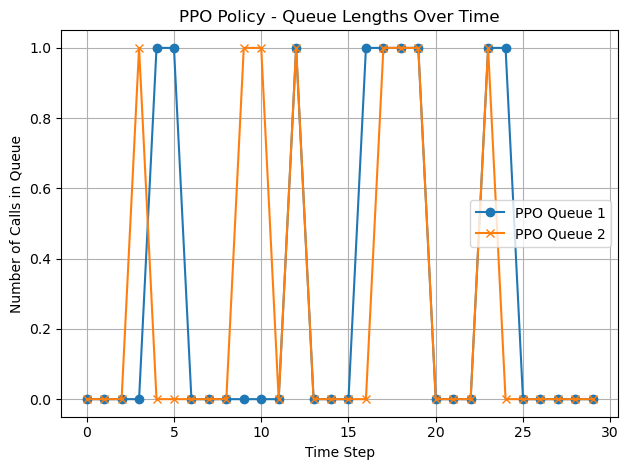

In [51]:
plt.plot(ppo_time_steps, ppo_q1_lengths, label="PPO Queue 1", marker='o')
plt.plot(ppo_time_steps, ppo_q2_lengths, label="PPO Queue 2", marker='x')
plt.title("PPO Policy - Queue Lengths Over Time")
plt.xlabel("Time Step")
plt.ylabel("Number of Calls in Queue")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Queue length Comparison

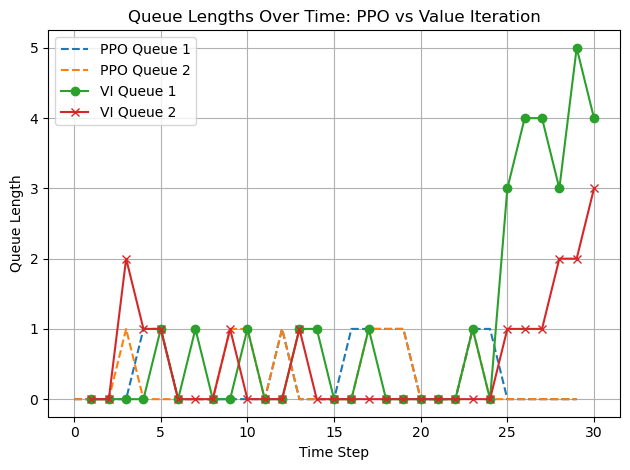

In [44]:
plt.plot(ppo_time_steps, ppo_q1_lengths, label="PPO Queue 1", linestyle='--')
plt.plot(ppo_time_steps, ppo_q2_lengths, label="PPO Queue 2", linestyle='--')
plt.plot(vi_time_steps, vi_q1_lengths, label="VI Queue 1", marker='o')
plt.plot(vi_time_steps, vi_q2_lengths, label="VI Queue 2", marker='x')
plt.title("Queue Lengths Over Time: PPO vs Value Iteration")
plt.xlabel("Time Step")
plt.ylabel("Queue Length")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Server Utilisation (PPO)

In [45]:
# Computing average server utilisation
util_s1 = np.mean(ppo_s1_status)
util_s2 = np.mean(ppo_s2_status)

print(f"PPO Server 1 Utilization: {util_s1:.2f}")
print(f"PPO Server 2 Utilization: {util_s2:.2f}")


PPO Server 1 Utilization: 0.47
PPO Server 2 Utilization: 0.30


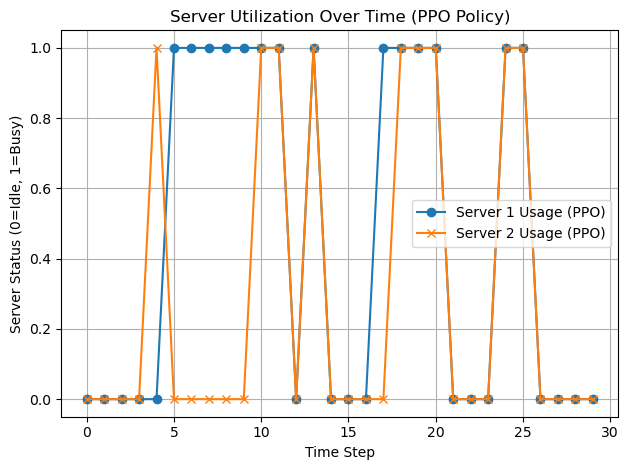

In [46]:
plt.plot(ppo_time_steps, ppo_s1_status, label="Server 1 Usage (PPO)", marker='o')
plt.plot(ppo_time_steps, ppo_s2_status, label="Server 2 Usage (PPO)", marker='x')
plt.title("Server Utilization Over Time (PPO Policy)")
plt.xlabel("Time Step")
plt.ylabel("Server Status (0=Idle, 1=Busy)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Server Utilisation (Value Iteration)

In [47]:
# Computing average server utilisation
util_s1_vi = np.mean(vi_s1_status)
util_s2_vi = np.mean(vi_s2_status)

print(f"VI Server 1 Utilization: {util_s1_vi:.2f}")
print(f"VI Server 2 Utilization: {util_s2_vi:.2f}")

VI Server 1 Utilization: 0.47
VI Server 2 Utilization: 0.23


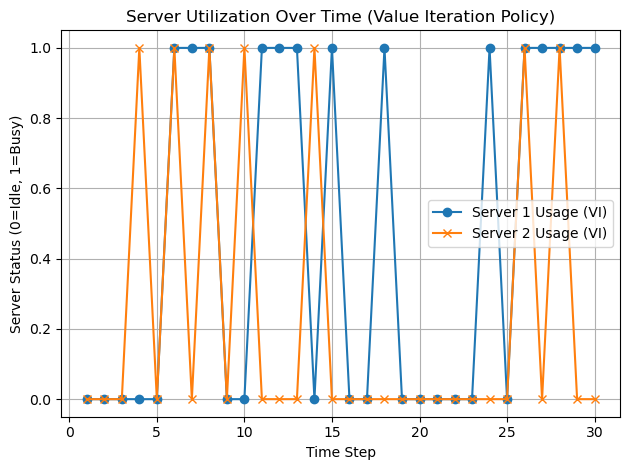

In [48]:
plt.plot(vi_time_steps, vi_s1_status, label="Server 1 Usage (VI)", marker='o')
plt.plot(vi_time_steps, vi_s2_status, label="Server 2 Usage (VI)", marker='x')
plt.title("Server Utilization Over Time (Value Iteration Policy)")
plt.xlabel("Time Step")
plt.ylabel("Server Status (0=Idle, 1=Busy)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

I acknowledge the use of python libraries, online resources and gpt for learning and developing this project.
I acknowledge the use of ChatGPT [https://chat.openai.com/] to learn more about gym environment and PPO along with gym library site. The following prompts were entered into ChatGPT:

- Proximal policy optimisation
- Python libraries we can use for implementing PPO 